<h1>This notebook is to demo the spectral processing module</h1>

In [1]:
# First we import the spectral processing module.
from SpectralProcessing import RamanProcessing as rp

# Along with some other modles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from pprint import pprint

In [2]:
# Next we need to creat a list of the files we want to process.
file_paths  =  ['Fed_Sample_1.txt',
                'Fed_Sample_2.txt',
                'Fed_Sample_3.txt',
                'Starved_Sample_1.txt',
                'Starved_Sample_2.txt',
                'Starved_Sample_3.txt']

# We will also need a list of ID's for each file.
sample_type =  ['Fed',
                'Fed',
                'Fed',
                'Starved',
                'Starved',
                'Starved']

In [3]:
# Using the list of files we will call 'readArrayFromFile()' to split each spectra in the
# files into an array of samples agains wavenumbers. This function also outputs a 1-D vector
# of wavenumbers and a 1-D vector of sample ID's corrisponding to the list we assinged earlyer
WN, array, sample_ID = rp.readArrayFromFile(file_paths, sample_type)

# From here we read the array of spectras into a data frame. The function needs a string to
# specify the name of the first column in the datframe. Each spectra in split into a 1-D 
# vector and stored in a single cell in the data frame.
df = rp.readArrayToDataFrame(array, 'Raw_array')

# Here we used the sample_ID vector to add a column with corrisponding labes for each spectra.
df['Sample_type'] = sample_ID

Data Frame:   0%|          | 0/294 [00:00<?, ?it/s]

**Now we have a data frame with the raw spectras in one column and their corisponding sample ID in another column.**

In [4]:
# Print out the data frame to see our nely organised data
df

,Raw_array,Sample_type
0,"[26710.0, 26676.5, 27451.3, 27090.6, 27390.3, ...",Fed
1,"[20872.9, 20961.2, 21280.4, 21066.7, 21254.9, ...",Fed
2,"[20245.6, 20717.6, 20692.8, 20914.5, 20512.3, ...",Fed
3,"[19466.1, 19691.5, 19822.1, 19788.3, 20086.2, ...",Fed
4,"[19310.8, 19545.3, 19965.2, 20114.0, 19550.6, ...",Fed
...,...,...
289,"[18391.5, 18211.9, 18184.4, 18382.2, 18306.1, ...",Starved
290,"[17240.5, 17133.9, 17018.4, 17329.0, 17222.6, ...",Starved
291,"[15958.6, 16208.3, 16254.2, 16117.6, 16093.5, ...",Starved
292,"[16512.8, 16716.8, 16820.5, 16714.2, 16623.1, ...",Starved


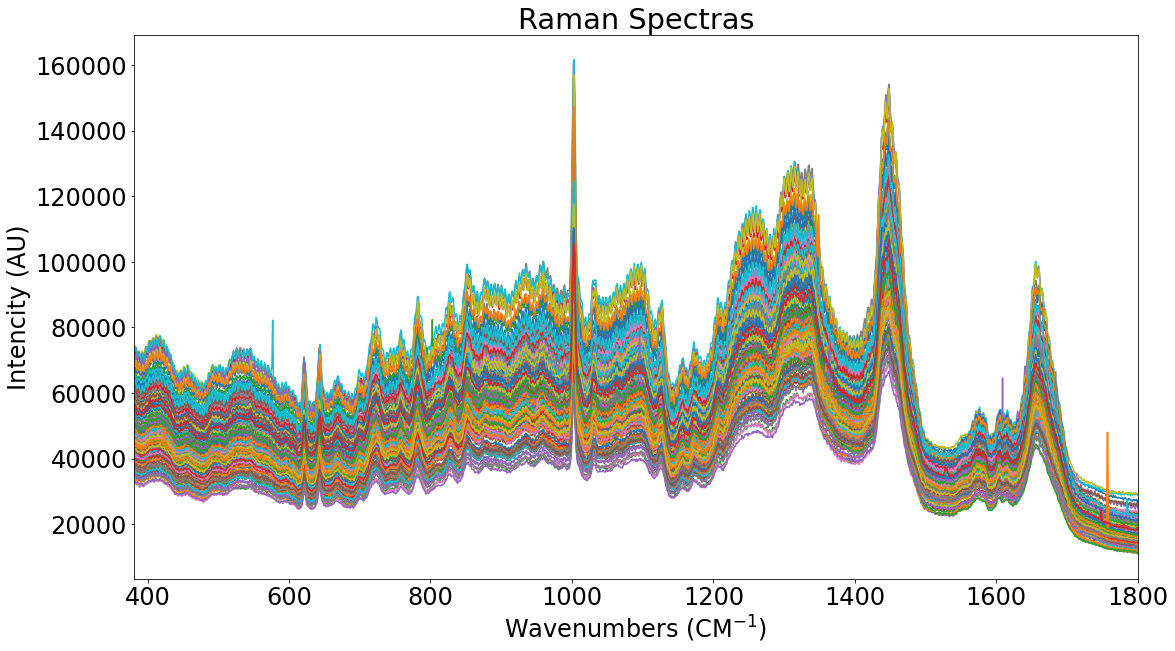

In [5]:
# To access a column of spectras we can stack them into an array.
spectras = np.stack(df['Raw_array'])

# This new array can be plotted.
plt.rcParams['figure.figsize'] = [18,10]
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 24}
plt.rc('font', **font)

plt.plot(WN, np.transpose(spectras))
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('Raman Spectras')
plt.xlabel('Wavenumbers (CM$^{-1}$)')
plt.ylabel('Intencity (AU)') 
plt.show()

**This module uses the dataframe as a history of the spectra processing. The function 'addColumnToDataFrame()' allows an array to be added to the exsiting df (note: 'readArrayToDataFrame()' creats a new data frame each time so you cant add coluns using it).**

In [6]:
# Next lets smooth the data. The 'smooth()' function takes a column from our dataframe and
# applies a smoothing algorithum to the data. In this case we will used a fast fourior
# transform (FFT) to smooth the data.
smoothed_array = rp.smooth(df['Raw_array'], method = 'FFT', fourior_values = 250)

# Once tyhe data is porcess we can add it to the data frame. The first argument is the data
# frame we are using, the second is the array we want to add and the third is the name for
# the new column.
df = rp.addColumnToDataFrame(df, smoothed_array, 'Smoothed_array')

Smoothed_array:   0%|          | 0/294 [00:00<?, ?it/s]

In [7]:
# Now we have two columns for spectras.
df

,Raw_array,Sample_type,Smoothed_array
0,"[26710.0, 26676.5, 27451.3, 27090.6, 27390.3, ...",Fed,"[39837.63810116894, 29335.409310520794, 24045...."
1,"[20872.9, 20961.2, 21280.4, 21066.7, 21254.9, ...",Fed,"[30872.650162199338, 22844.39397279817, 18764...."
2,"[20245.6, 20717.6, 20692.8, 20914.5, 20512.3, ...",Fed,"[31451.256552669198, 22599.243821612155, 18082..."
3,"[19466.1, 19691.5, 19822.1, 19788.3, 20086.2, ...",Fed,"[30352.742891528716, 21657.993245521007, 17268..."
4,"[19310.8, 19545.3, 19965.2, 20114.0, 19550.6, ...",Fed,"[34519.11480304156, 22334.52723851832, 16213.9..."
...,...,...,...
289,"[18391.5, 18211.9, 18184.4, 18382.2, 18306.1, ...",Starved,"[30377.315460535883, 20493.614460258705, 15422..."
290,"[17240.5, 17133.9, 17018.4, 17329.0, 17222.6, ...",Starved,"[30170.1139897546, 19619.32953814257, 14137.70..."
291,"[15958.6, 16208.3, 16254.2, 16117.6, 16093.5, ...",Starved,"[25705.869627298565, 18039.210910469857, 14197..."
292,"[16512.8, 16716.8, 16820.5, 16714.2, 16623.1, ...",Starved,"[28210.567180607206, 18857.2236841422, 14033.0..."


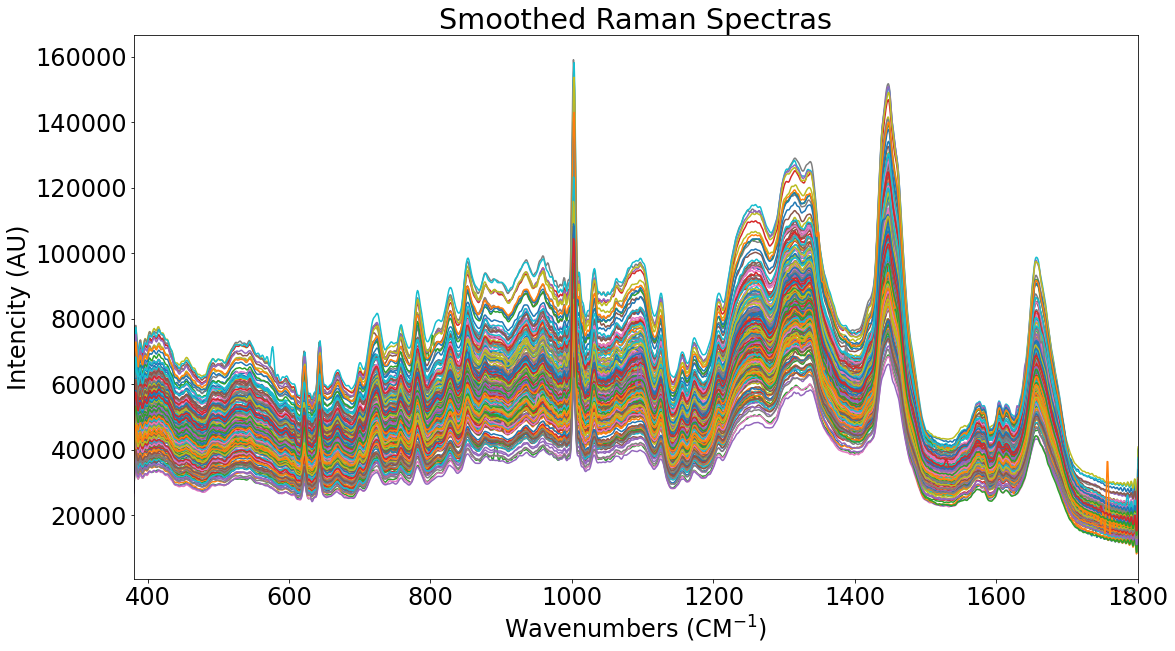

In [8]:
# We can now stack and plot this new column.
spectras_smoothed = np.stack(df['Smoothed_array'])

plt.plot(WN, np.transpose(spectras_smoothed))
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('Smoothed Raman Spectras')
plt.xlabel('Wavenumbers (CM$^{-1}$)')
plt.ylabel('Intencity (AU)') 
plt.show()

**Using this method we can creat a whole processing pipeline with whatever steps we want in whatever order we want.**

**Lets take a look at a more complicated porcessing pipeline.**

Normalized_array:   0%|          | 0/294 [00:00<?, ?it/s]

Baseline:   0%|          | 0/294 [00:00<?, ?it/s]

Baseline_corrected_array:   0%|          | 0/294 [00:00<?, ?it/s]

Despike:   0%|          | 0/1512 [00:00<?, ?it/s]

Despiked_array:   0%|          | 0/294 [00:00<?, ?it/s]

Baseline_corrected_Normalized_array:   0%|          | 0/294 [00:00<?, ?it/s]

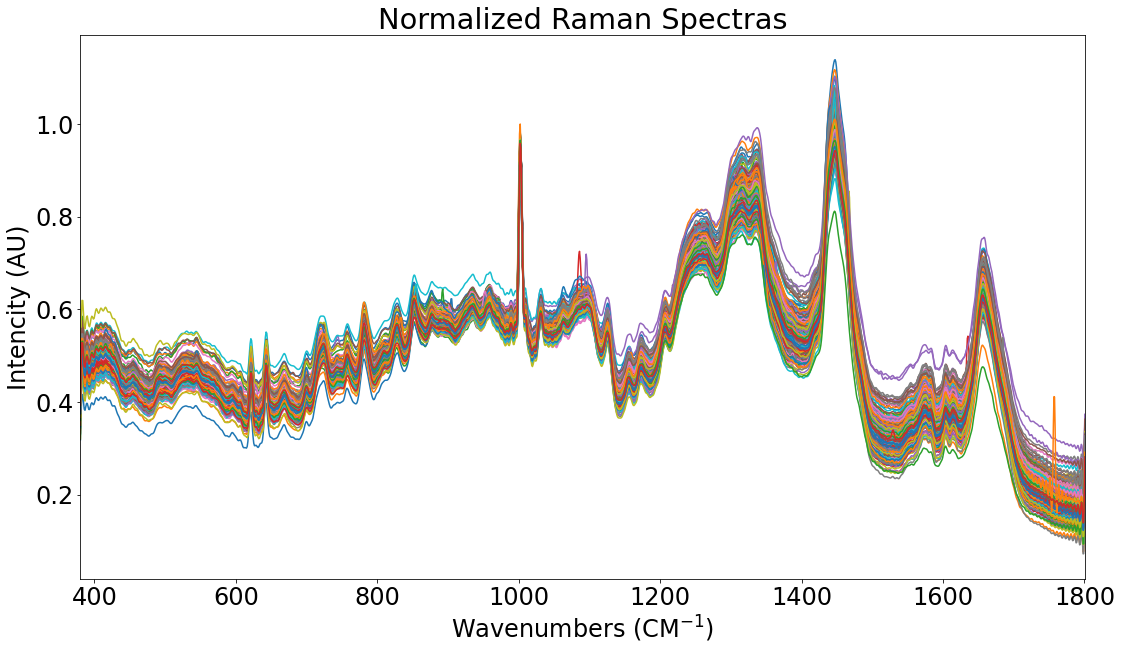

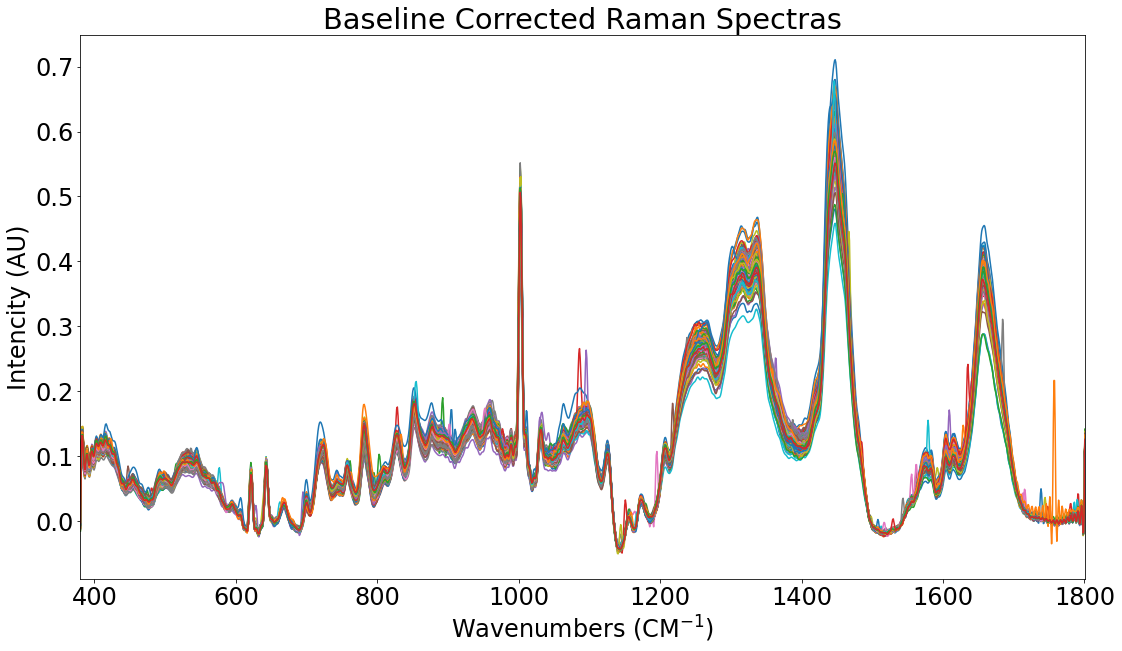

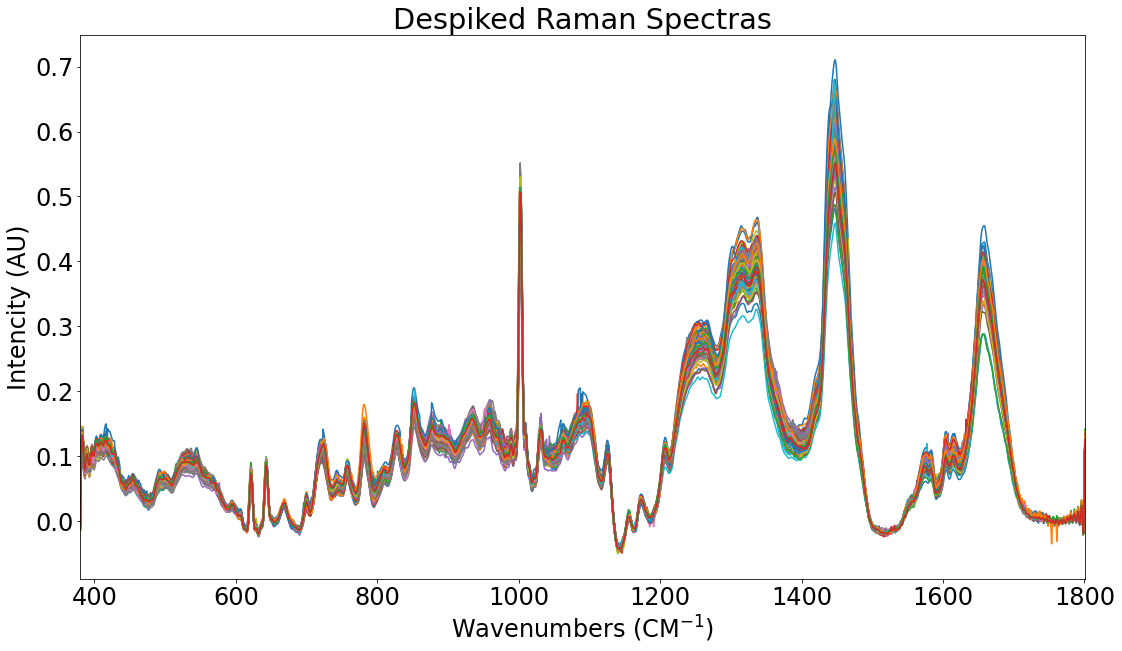

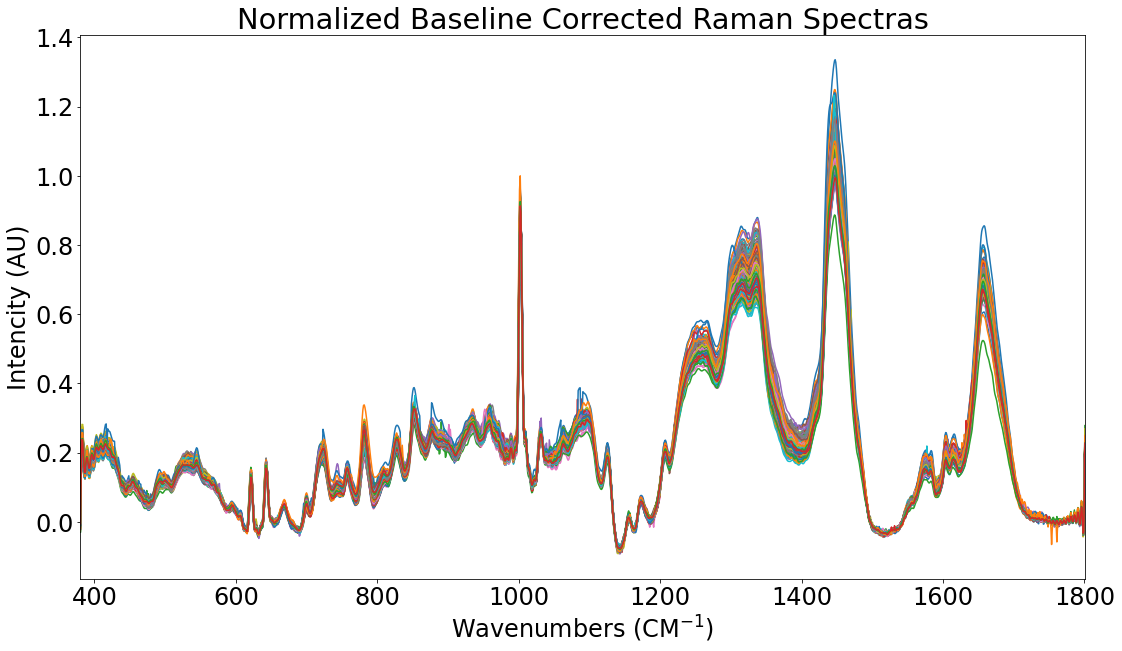

In [9]:
# Lets take our smoothed data and normalise, balseline correct, despike and normalise (again).
df = rp.addColumnToDataFrame(df,
                             rp.normalise(df['Smoothed_array'],
                                          method = 'interp_area',
                                          normalisation_indexs = (895,901)),
                             'Normalized_array')

df = rp.addColumnToDataFrame(df,
                             rp.baselineCorrection(df['Normalized_array'],
                                                   lam=10**7),
                             'Baseline_corrected_array')

df = rp.addColumnToDataFrame(df,
                             rp.removeCosmicRaySpikes(df['Baseline_corrected_array'],
                                                      threshold = 5),
                             'Despiked_array')

df = rp.addColumnToDataFrame(df,
                             rp.normalise(df['Despiked_array'],
                                          method = 'interp_area',
                                          normalisation_indexs = (895,901)),
                             'Baseline_corrected_Normalized_array')

# Now we can plot the results of each stage in theis pipeline.
plt.plot(WN,np.transpose(np.stack(df['Normalized_array'])))
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('Normalized Raman Spectras')
plt.xlabel('Wavenumbers (CM$^{-1}$)')
plt.ylabel('Intencity (AU)') 
plt.show()
plt.plot(WN,np.transpose(np.stack(df['Baseline_corrected_array'])))
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('Baseline Corrected Raman Spectras')
plt.xlabel('Wavenumbers (CM$^{-1}$)')
plt.ylabel('Intencity (AU)') 
plt.show()
plt.plot(WN,np.transpose(np.stack(df['Despiked_array'])))
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('Despiked Raman Spectras')
plt.xlabel('Wavenumbers (CM$^{-1}$)')
plt.ylabel('Intencity (AU)') 
plt.show()
plt.plot(WN,np.transpose(np.stack(df['Baseline_corrected_Normalized_array'])))
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('Normalized Baseline Corrected Raman Spectras')
plt.xlabel('Wavenumbers (CM$^{-1}$)')
plt.ylabel('Intencity (AU)') 
plt.show()

In [10]:
# We can also assess the effectiness of each step by calculating the signal to noise ratio.
rp.signalToNoiseOfDataframe(df)

# It should be noted that the signal to noise calculation here uses the standard devaition
# as the noise and the squareroot of the mean as the siganl. Because of this squareroot it is
# bias towards smaller values so and data that is not normalised to 1.0 can not be compaiered
# accuratly.

{'Raw_array': 0.030195701683634328,
 'Sample_type': None,
 'Smoothed_array': 0.030215547559248313,
 'Normalized_array': 31.79298096294962,
 'Baseline_corrected_array': 46.48541438830001,
 'Despiked_array': 48.21451153412829,
 'Baseline_corrected_Normalized_array': 37.1238501317012}

**The module also comes with functions to utalize machine learning (ML) for spectral analysis.**

In [11]:
# Warning are supresed as scikit learn can clog up the output when running multiple
# repeats of ML modles.
warnings.filterwarnings("ignore")

# Lets apply some ML models to our data. The function 'applyMachineLearingPredictors()'
# takes two positional arguments; fist is the column we want to test and the second is
# the sample ID's. A full list of the peramiter for each function can be found in the
# documentation.
CV_Train, CV_Test = rp.applyMachineLearingPredictors(df['Baseline_corrected_Normalized_array'],
                                                     df['Sample_type'],
                                                     principal_components=10,
                                                     CV=10,
                                                     test_size=0.2)

# The output is two dictionarys of cross valiudation values for both a traing data set
# and test data set.
print('Cross-validation results for the training data set')
pprint(CV_Train)
print('')
print('Cross-validation results for the test data set')
pprint(CV_Test)

Cross-Validating Models:   0%|          | 0/9 [00:00<?, ?it/s]

Cross-validation results for the training data set
{'ann': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'knnd': array([0.95833333, 0.95833333, 1.        , 0.95833333, 0.95833333,
       0.86956522, 0.91304348, 0.82608696, 0.95652174, 1.        ]),
 'knnu': array([0.95833333, 0.875     , 0.95833333, 0.91666667, 0.91666667,
       0.82608696, 0.86956522, 0.73913043, 0.95652174, 1.        ]),
 'lda': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.95652174, 1.        , 1.        , 1.        ]),
 'lgr': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.95652174, 0.95652174, 0.95652174, 1.        , 1.        ]),
 'lsvm': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'qda': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'rfs': array([1.        , 1.        , 1.        , 0.95833333, 1.        ,
       1.        , 1.        , 1.        , 0.91304348, 1.        ]),
 'sgd': array([1.        , 1.        , 1.        , 1.  

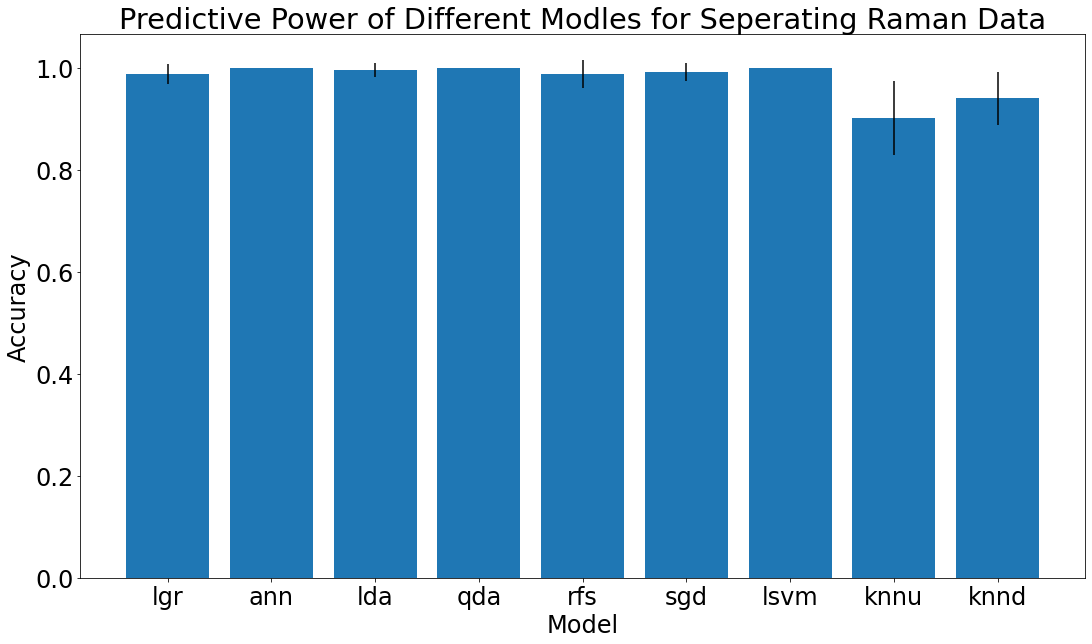

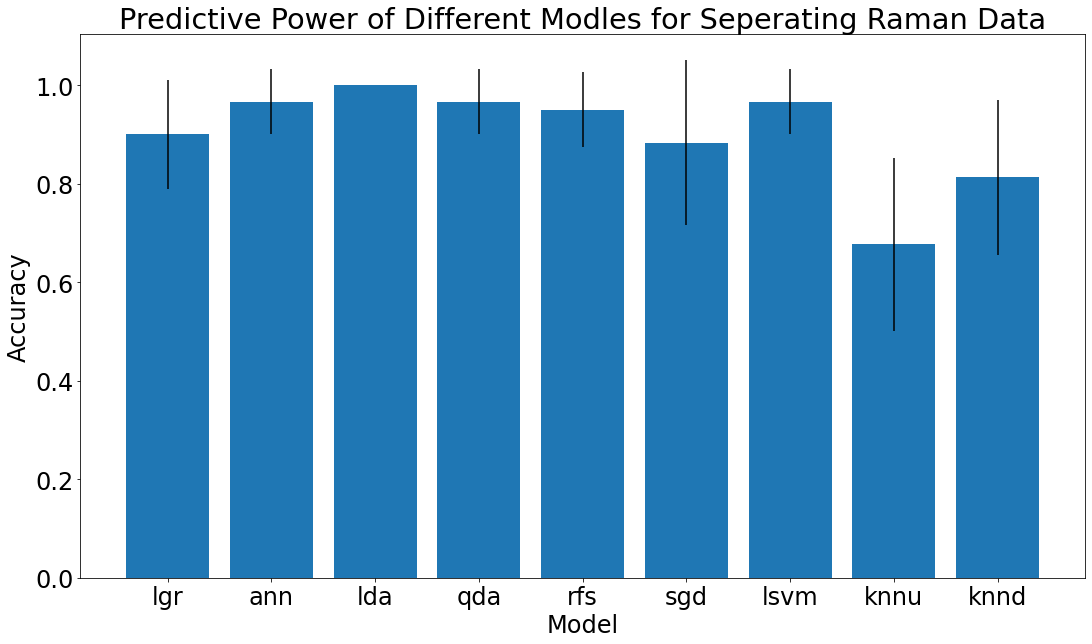

In [12]:
#The results can be better visulised via the 'dispayCVResults()' function.
rp.dispayCVResults(CV_Train)
rp.dispayCVResults(CV_Test)